# <center> Econometria Financiera <center>
    
    
<h2><center> Tarea #4</center></h2>

<center> Ketherine Jimenez 1106918 - Aura Gonzalez 1106920 - Eddily Sanchez 1096853<center>

**The Risk of Stocks in the Long-Run: The Barnstable College Endowment [HBS 9-296073].**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set()

#Cargando data
path="/Users/Aura/Desktop/barnstable_analysis_data.xlsx"
df  = pd.read_excel(path, sheet_name=1)
df = df.set_index('date')
df['tilde_r'] = df['SPX'] - df['TB1M']



### Análisis de Barnstable

#### 1. La filosofía de Barnstable 

***a) ¿Cuál ha sido la estrategia de inversión de Barnstable en el pasado?*** 

La estrategia de la universidad era invertir el 4% y el 5% de la dotación cada año. Este gasto era utilizado para atraer y capacitar a estudiante del mas alto calibre, pero con antecedentes económicos bajos. Estos fondos le permitieron ofrecer cantidades significativas de dinero para becas por mérito, así como mantener la matricula en niveles moderados. 

***b) Explique la lógica detrás de la perspectiva de que las acciones son más seguras en el largo plazo.***

Básicamente, se justifica a través de la ley de los grandes números, que en teoría indica que, si repetimos muchas veces un mismo evento (en este caso los movimientos de valores), la frecuencia de que suceda un cierto evento tiende a ser una constante. Mientras mas largo sea el plazo, el nivel de riesgo podría limitarse hasta llegar a cero. Esto presume que los rendimientos anuales son constantes e ignora la capitalización.

***c) ¿Qué supuestos subyacen bajo la perspectiva de Barnstable de que en el largo plazo las acciones son más seguras? ***

1- La desviación estándar de los rendimientos crece con el tiempo, pero no tan rápido como el rendimiento esperado, que crece proporcionalmente con el tiempo.

Si σ es la desviación estándar de los rendimientos para un período de tenencia de un año, entonces la desviación estándar de los rendimientos para un período de tenencia de T años es σ √T.

2- Ley de los grandes números. Si los movimientos del mercado de valores son aleatorios, los riesgos de un día a otro o de un mes a otro no están correlacionados secuencialmente. Estos movimientos no correlacionados se anulan entre sí hasta cierto punto, mientras que la desviación estándar anual es constante

#### 2. Las dos propuestas.

*** a) Describa las dos propuestas que Barnstable está considerando para tomar ventaja de la perspectiva sobre la seguridad de largo plazo de las acciones.***
 
1.	Cuando los rendimientos de las acciones tienen una distribución logarítmica normal, el rendimiento mediano viene dado por el promedio geométrico de los rendimientos. La media geométrica es la media aritmética menos la mitad de la varianza, o •-½•2, donde • es la media aritmética y • es la desviación estándar de los rendimientos. Con una desviación estándar anual de los rendimientos de • = 16 % y un rendimiento aritmético esperado de • = 13 % anual, el rendimiento mediano o medio geométrico es 11,7 % anual (0,13 - ½(0,16)2= 0,117).

2.	Los fideicomisos tendrían una vida fija de 30 años, durante este tiempo los activos serian administrados como índices bursátiles S&P 500, incluía la reinversión de los dividendos. Terminado el último año (30), el fideicomiso se liquidaría y los activos se distribuirían entre los tenedores de obligaciones (los tenedores de Acciones Ordinarias recibirían cualquier activo que exceda el “valor de rescate”, mientras que los tenedores de Acciones Preferenciales recibirían el valor de rescate, o el valor de los bienes, el que fuera menor.

El valor de la redención sería igual a Con capitalización continua a una tasa r por año, un dólar en el tiempo cero crece a ert durante t años. Si la tasa de rendimiento capitalizada continuamente es 6% anual, la tasa anual de capitalización es e0.06= 6,184%.

*** b) ¿Acaso estas dos propuestas asumen la misma apuesta en el rendimiento a largo plazo de las acciones? **** 

No.  ¿En qué escenarios se obtendrán retornos diferentes? Si se realiza una venta de las acciones antes del tiempo de vencimiento. Es decir, cuando se determine el precio de ejercicio de la acción, a través de la primera propuesta el rendimiento seria igual a de una opción de venta sobre una inversión inicial de un dólar en el índice S&P 500 es de $1.062 por una inversión de un año, mientras que, en la segunda propuesta, las ventas de acciones preferenciales es libre de riesgo, obtendrían un precio muy alto relativo a la compra inicial, conservando sus acciones ordinarios en el mercado. 


# 2. Estimando el bajo rendimiento.

Use los retornos del S&P500 ($r^m$) y Tbills ($r^f$) provistos en “barnstable_data.xlsx”. Este problema solo usa la data desde 1965 en adelante.

### 1. Los estimadores de media y volatilidad de Barnstable están basados en la submuestra de 1965 hasta 1999. Aquí, nosotros utilizamos la data completa del archivo, (1965-2020) para estimar los parámetros de los parámetros.

***a. Reporte los siguientes estadísticos (anualizados).***


In [2]:
display(pd.DataFrame(df.mean() * 12, columns=['Mean']).T)

,SPX,TB1M,tilde_r
Mean,0.115692,0.031809,0.083582


In [3]:
m = 0.13
sigma = 0.16
mu = np.log(m + 1) - 1/2 * sigma**2
print('mu (logs) = {:.3f}'.format(mu))

s = np.sqrt(np.exp(2 * mu + sigma**2) * (np.exp(sigma**2) - 1))
print('Std.dev (levels) = {:.3f}'.format(s)) # standard deviation of log return
print('Var (levels) = {:.3f}'.format(s**2)) # variance of log return

q1 = pd.DataFrame(columns=['Mean','Var'], index=['Return Levels','Return Logs'])
q1.loc['Return Levels'] = [0.13, round(s**2, 3)]
q1.loc['Return Logs'] = [mu, round(0.16**2,3)]
q1.style.set_caption('Solution Table 1: Case Parameters.')

mu (logs) = 0.109
Std.dev (levels) = 0.182
Var (levels) = 0.033


,Mean,Var
Return Levels,0.130000,0.033000
Return Logs,0.109418,0.026000


In [4]:
def subtable_2_1(r_M='SPX', r_f='TB1M', df=df):
    table = pd.DataFrame(columns=['mean', 'std'],
        index=['r_M', 'tilde_r_M', 'r_f'])

    table.loc['r_M', 'mean'] = df[r_M].mean() * 12
    table.loc['r_f', 'mean'] = df[r_f].mean() * 12
    table.loc['tilde_r_M', 'mean'] = table.loc['r_M', 'mean'] - table.loc['r_f', 'mean']

    table.loc['r_M', 'std'] = df[r_M].std() * np.sqrt(12)
    table.loc['r_f', 'std'] = df[r_f].std() * np.sqrt(12)
    table.loc['tilde_r_M', 'std'] = (df[r_M] - df[r_f]).std() * np.sqrt(12)
    return table

# Levels
df_subset = df.loc['1965':'1999']
subtable_level_1965_1999 = subtable_2_1(df=df_subset)

df_subset = df.loc['2000':'2021']
subtable_level_2000_2021 = subtable_2_1(df=df_subset)

df_subset = df.loc['1926':'2021']
subtable_level_1926_2021 = subtable_2_1(df=df_subset)

# Logs
df_subset = np.log(df.loc['1965':'1999'] + 1)
subtable_log_1965_1999 = subtable_2_1(df=df_subset)

df_subset = np.log(df.loc['2000':'2021'] + 1)
subtable_log_2000_2021 = subtable_2_1(df=df_subset)

df_subset = np.log(df.loc['1936':'2021'] + 1)
subtable_log_1926_2021 = subtable_2_1(df=df_subset)

In [12]:
subtable_level_1965_1999

,mean,std
r_M,0.129354,0.149404
tilde_r_M,0.067851,0.150226
r_f,0.061503,0.007179


In [5]:
subtable_level_1965_1999 = subtable_level_1965_1999.rename(columns=\
                    {'mean':'mean 1965-1999','std':'std 1965-1999'})

subtable_level_2000_2021 = subtable_level_2000_2021.rename(columns=\
                    {'mean':'mean 2000-2021','std':'std 2000-2021'})

subtable_level_1926_2021 = subtable_level_1926_2021.rename(columns=\
                    {'mean':'mean 1926-2021','std':'std 1926-2021'})

q21 = pd.concat([subtable_level_1965_1999,subtable_level_2000_2021,subtable_level_1926_2021], axis=1)
print('Solution Table 2: Case Parameters for LEVELS')
display(q21)

subtable_log_1965_1999 = subtable_log_1965_1999.rename(columns=\
                    {'mean':'mean 1965-1999','std':'std 1965-1999'})
subtable_log_2000_2020 = subtable_log_2000_2021.rename(columns=\
                    {'mean':'mean 2000-2021','std':'std 2000-2021'})
subtable_log_1926_2021 = subtable_log_1926_2021.rename(columns=\
                    {'mean':'mean 1926-2021','std':'std 1926-2021'})
q22 = pd.concat([subtable_log_1965_1999,subtable_log_2000_2021,subtable_log_1926_2021], axis=1)
print('Solution Table 3: Case Parameters for LOGS')
display(q22)

Solution Table 2: Case Parameters for LEVELS


,mean 1965-1999,std 1965-1999,mean 2000-2021,std 2000-2021,mean 1926-2021,std 1926-2021
r_M,0.129354,0.149404,0.083958,0.1499,0.115692,0.187193
tilde_r_M,0.067851,0.150226,0.069255,0.150526,0.083883,0.187949
r_f,0.061503,0.007179,0.014703,0.005038,0.031809,0.008581


Solution Table 3: Case Parameters for LOGS


,mean 1965-1999,std 1965-1999,mean,std,mean 1926-2021,std 1926-2021
r_M,0.1176,0.149568,0.07242,0.151027,0.104303,0.157406
tilde_r_M,0.056279,0.150396,0.057738,0.151634,0.071142,0.158109
r_f,0.06132,0.007132,0.014681,0.005028,0.033161,0.008789



***b. Comente como los estadísticos de la muestra completa se comparan con la submuestra. Comente como los estadísticos nivel (level) se comparan con los estadísticos en log.***



(Cambiar respuestas a nuestro caso)

<span style="color:#00008B"> **Solución:** Vea Table 2 and Table 3.</span>

<span style="color:#00008B"> - La muestra 1965-1999 cubierta en el caso tiene un retorno promedio del mercado mucho mayor que los periodos subsiguientes.</span>

<span style="color:#00008B"> - Esto es explicado en gran parte por el nivel tan bajo de la tasa libre de riesgo en submuestra futura.</span>

<span style="color:#00008B"> - El exceso de retorno es menor en promedio en los periodos subsiguientes, pero no es tan dramático como los retornos totales de mercado y la tasa libre de riesgo.</span>

<span style="color:#00008B"> - Los log-retornos muestran una menor media como es de esperarse. </span>

### 2. En el caso se asume que los retornos de las acciones son iid, y distribuidos log normalmente.


La siguiente tabla muestra los estadisticos dados en el caso,

Note que la media estimada es por los retornos-nivel, 𝑟𝑡^𝑀, mientras que la volatilidad estimada corresponde a los log-retornos, r𝑡^𝑀. Aquí y en cualquier ocasión es beneficioso trasladar la media y la volatilidad de nivel a logs -por lo menos en el caso lognormal.

Usando las siguientes formulas en nivel-retorno para trasladar la media y la varianza a log-retornos



a. Utilice las estimaciones en la tabla de arriba, así como también las ecuaciones para calcular la media de los log-retornos, μ.
¿Acaso es la misma respuesta que la calculada en el caso, 0.117? (Pie de Página 3.)

In [6]:
m = 0.13
sigma = 0.16
mu = np.log(m + 1) - 1/2 * sigma**2
print('mu (logs) = {:.3f}'.format(mu))

s = np.sqrt(np.exp(2 * mu + sigma**2) * (np.exp(sigma**2) - 1))

# Logs
q1 = pd.DataFrame(columns=['Mean','Var'], index=['Return Levels','Return Logs'])
q1.loc['Return Levels'] = [0.13, round(s**2, 3)]
q1.loc['Return Logs'] = [mu, round(0.16**2,3)]
q1.style.set_caption('Table 4: Case Barnstable case estimates')

mu (logs) = 0.109


,Mean,Var
Return Levels,0.130000,0.033000
Return Logs,0.109418,0.026000


***b. También calcule var[𝑟t^𝑀].***

In [7]:
def level_var(level_mu, log_sigma):
    log_mu = log_mu(level_mu, log_sigma)
    return np.exp(2*log_mu + log_sigma) * (np.exp(log_sigma**2) - 1)



In [10]:
print('variance of level return of stocks' + (round(level_var).13,.16, 4)))

SyntaxError: invalid syntax (3819952026.py, line 1)

***c. ¿Son la media y la volatilidad mayores para las variables en nivel o en log-retornos?***

Respuesta

#### 3. ¿Acaso el análisis cambia significativamente si utilizamos la data pre-1965 en nuestros estimados de retornos de mercado y la tasa libre de riesgo?

## 3. Modelando Volatilidad y VaR

### Para la muestra completa de los retornos de mercado, 1926-2021, calcule el nivel (no, LOG) exceso de retorno. Utilizaremos data en exceso de retorno durante esta sección completa.

In [16]:
df.head()

,SPX,TB1M,tilde_r
date,,,
1926-01-30,-0.001783,0.003061,-0.004844
1926-02-27,-0.033296,0.002612,-0.035908
1926-03-31,-0.057708,0.002601,-0.060309
1926-04-30,0.038522,0.002270,0.036252
1926-05-28,0.013623,0.002691,0.010932


### 1. VaR Histórico

Empezando en t=61, calcule el VaR histórico, basando en la muestra expandida desde el periodo 1 (enero 1926) hasta t-1. Por VaR histórico, simplemente tomamos el 5to cuantil de la muestra histórica hasta t-1. Claramente, para una muestra con un tamaño que no sea un múltiplo de 100 requiere alguna interpolación del 5to cuantil. Los paquetes estadísticos de Python pueden manejar esto.

Denote esto como r^VaR0.5,.05 el cuál es el mejor estimador del VaR en el tiempo t basado en la data hasta t-1. 





***• Grafique r^VaR0.5, a través del tiempo.***


Text(0.5, 1.0, 'Historical VaR')

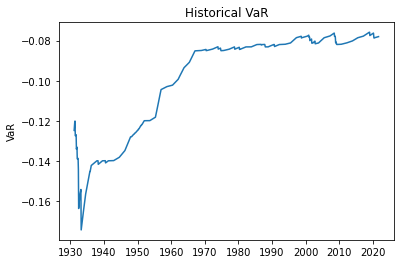

In [17]:
#part (a)
var_hist = df['tilde_r'].shift(1).expanding(61).quantile(0.05).dropna()
plt.plot(var_hist)
plt.ylabel('VaR')
plt.title("Historical VaR")

***• Calcule la frecuencia de los periodos en que r^VaR0.5***

In [20]:
#part (b)
freq = np.size(var_hist[df.iloc[61:]['tilde_r']<var_hist])
print("Frequency of r_tilde < r_tilde_var: %d" %freq)
np.round(freq*100/np.size(var_hist.index),2)

Frequency of r_tilde < r_tilde_var: 31


2.85

***• Que diferencias puede senalar en este VaR historico?***

Respuesta

### 2. Volatibilidad

***a) Para cada uno de estos métodos, grafique 𝜎𝜎𝑡𝑡. (Grafique volatilidad, no varianza.)***


In [21]:
import itertools
#part a
def rms(x):
    return (lambda x: ((x**2).sum()/len(x))**(0.5))

sigma_expanding = df['tilde_r'].shift(1).dropna().expanding(60).apply(lambda x: ((x**2).sum()/len(x))**(0.5))
sigma_roll = df['tilde_r'].shift(1).dropna().rolling(60).apply(lambda x: ((x**2).sum()/len(x))**(0.5))

#IGARCH
ig = df['tilde_r'].shift(1).dropna()
ig.iloc[0] = 0.15

sigma_ig = pd.Series(itertools.accumulate(ig, lambda a, b: (0.97 * a**2 + (1-0.97) * b**2)**0.5), index=sigma_expanding.index)

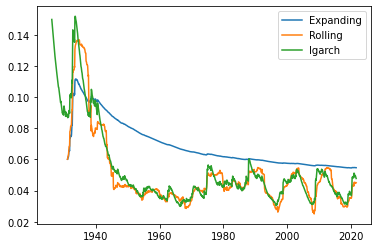

In [22]:
plt.plot(sigma_expanding,label='Expanding')
plt.plot(sigma_roll,label='Rolling')
plt.plot(sigma_ig,label='Igarch')
plt.legend()

***b) Para cada método, calcule 5to percentil, es decir, el VaR proyectado para el siguiente día. En este caso
utilizamos una versión simplificada del VaR utilizando distribución normal, no considerando μ de la formula, y redondeando el z-score a -1.65.***

In [27]:
#part b
var_expanding = -1.65*sigma_expanding
var_roll = -1.65*sigma_roll
var_igarch = -1.65*sigma_ig

q22 = pd.concat([var_expanding,var_roll,var_igarch], axis=1)
print('Solution Table 4')
display(q22)

Solution Table 3: Case Parameters for LOGS


,tilde_r,tilde_r,0
date,,,
1926-02-27,NaN,NaN,-0.247500
1926-03-31,NaN,NaN,-0.243975
1926-04-30,NaN,NaN,-0.240905
1926-05-28,NaN,NaN,-0.237490
1926-06-30,NaN,NaN,-0.233921
...,...,...,...
2021-04-30,-0.090351,-0.073571,-0.081622
2021-05-28,-0.090349,-0.074457,-0.081851
2021-06-30,-0.090310,-0.074367,-0.080633


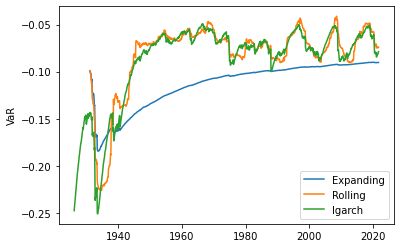

In [24]:
plt.plot(var_expanding,label='Expanding')
plt.plot(var_roll,label='Rolling')
plt.plot(var_igarch,label='Igarch')
plt.ylabel('VaR')
plt.legend()

***c) Para cada una de estas estimaciones, calcule la frecuencia de los periodos donde rt^VaR,.05.***


In [28]:
#part c
freq = np.size(var_expanding[df.loc[var_expanding.index]['tilde_r']<var_expanding])
print("Frequency of tilde_r < var_expanding: %d" %freq)
freq = np.size(var_roll[df.loc[var_roll.index]['tilde_r']<var_roll])
print("Frequency of tilde_r < var_rolling: %d" %freq)
freq = np.size(var_igarch[df.loc[var_igarch.index]['tilde_r']<var_igarch])
print("Frequency of tilde_r < var_igarch: %d" %freq)

Frequency of tilde_r < var_expanding: 19
Frequency of tilde_r < var_rolling: 51
Frequency of tilde_r < var_igarch: 46


***d) Compare y contraste los resultados de cada una de estas estimaciones paramétricas y relativa con el método histórico.***

In [ ]:
Respuesta